**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
# Load the data and cleanup
#Loading the Feature matrix and Label vector
df_1=pd.read_csv('train_data.csv')
df_2=pd.read_csv('train_labels.csv')
# convert the data frame to numpy matrix    
X = df_1.as_matrix() 
N,d = df_1.shape #N=example d=features
Y=df_2.as_matrix() 

def getValueNames():
    return ['Rythm', 'Chroma', 'MFCC']

def getValueProps():
    return {'Rythm' : ['mean', 'median','variance','kurtosis','skeness','min', 'max'],
            'Chroma': ['mean','standard deviation','min', 'max'],
            'MFCC'  : ['mean','standard deviation','min', 'max']}

def getValueTracks():
    return {'Rythm' : 24,
            'Chroma': 12,
            'MFCC'  : 12}

def getPropertyNameDict():
    prop_namedict = {}
    value_names = getValueNames()
    value_properties = getValueProps()
    value_tracks = getValueTracks()
    i = 0
    for name in value_names:
        for prop in value_properties.get(name):
            for track in range(value_tracks.get(name)):
                string = name + ' ' + prop + ' ' + str(track)
                prop_namedict[i] = string 
                i+=1
    return prop_namedict

property_namedict = getPropertyNameDict()
print(Y)

[[1]
 [1]
 [1]
 ...
 [2]
 [5]
 [2]]


C:\Users\wim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\wim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


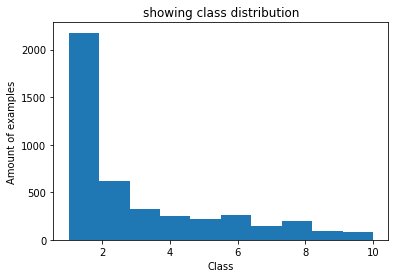

In [35]:
def plotClassDistributionHistogram(labels):
    plt.hist(labels,bins=10,range=[1,10],align='mid')
    plt.xlabel('Class')
    plt.ylabel('Amount of examples')
    plt.title('showing class distribution')
    plt.show()
    #bounts, bins, bars = plt.hist(labels)

plotClassDistributionHistogram(Y)

In [114]:
#getIndexes of all properties
def getIndexesOfProperty(property_namedict,valueName='',propName=''):
    string = valueName + ' ' + propName
    indexes = [i for i in property_namedict.keys() if string in property_namedict.get(i)]
    return indexes

# calculate, for every feature in features, the average of a property accross all tracks
def averageOfTracks(features,valueName,propName):
    indices = getIndexesOfProperty(getPropertyNameDict(),valueName,propName)
    averages = {}
    i = 0
    for feature in features:
        averages[i] = np.mean([feature[j] for j in indices])
        i+=1
    return averages

# create a dictionary that sorts all indices of a given dictionary in its corresponding class
def sortValuesInClasses(valueDict,labels):
    dict = {}
    for feature_index in valueDict.keys():
        label = labels[feature_index][0]
        if not(label in dict):
            dict[label] = {}
        dict[labels[feature_index][0]][feature_index]=valueDict.get(feature_index)
    return dict

In [149]:
def normalize(dictionary):
    avg = np.mean(list(dictionary.values()))
    normalizedDict = {}
    for i in dictionary.keys():
        normalizedDict[i]=dictionary.get(i)/avg
    return normalizedDict

def plotValuePerClass(valueName,propName,trackNum,features,labels,normalized):
    indices = getIndexesOfProperty(property_namedict,valueName,propName)
    index = indices[trackNum]
    print(index)
    values = {k: features[k][index] for k in range(len(features))}
    valuesPerClass = sortValuesInClasses(values,labels)
    meanValuesPerClass = {}
    for classIndex in averagesPerClass.keys():
        meanValuesPerClass[classIndex] = np.mean(list(valuesPerClass.get(classIndex).values()))
    if normalized:
        meanValuesPerClass = normalize(meanValuesPerClass)
    plt.scatter(meanValuesPerClass.keys(),meanValuesPerClass.values())
    plt.title('Scatter plot for feature ' + valueName + ' ' + propName + ' ' + str(trackNum))
    plt.xlabel('classes')
    plt.ylabel('Average of ' + valueName + ' ' + propName)
    plt.show()
    
    
def plotValuePerClassWithAverageAcrossTracks(valueName,propName,features,labels,normalized):
    averages = averageOfTracks(features,valueName,propName)
    averagesPerClass = sortValuesInClasses(averages,labels)
    meanAveragePerClass = {}
    for classIndex in averagesPerClass.keys():
        meanAveragePerClass[classIndex] = np.mean(list(averagesPerClass.get(classIndex).values()))
    if normalized:
        meanAveragePerClass = normalize(meanAveragePerClass)
    plt.scatter(meanAveragePerClass.keys(),meanAveragePerClass.values())
    plt.title('Scatter plot for feature ' + valueName + ' ' + propName)
    plt.xlabel('classes')
    plt.ylabel('Average of ' + valueName + ' ' + propName)
    plt.show()


    
# Makes a plot of every property, taking the averages across all tracks
def plotAllValuesWithAveragesAcrossTracks(features,labels,normalized=True):
    for valueName in getValueNames():
        for propName in getValueProps().get(valueName):
            plotValueWithAverageAcrossTracks(valueName,propName,features,labels,normalized)

def plotSpecifiedValuesPerTrack(features,labels,valuePropDict,normalized=True):
    for valueName in valuePropDict.keys():
        for propName in valuePropDict.get(valueName):
            for trackNum in range(getValueTracks().get(valueName)):
                plotValuePerClass(valueName,propName,trackNum,features,labels,normalized)




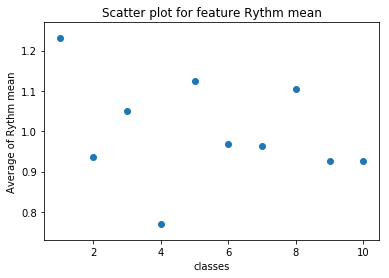

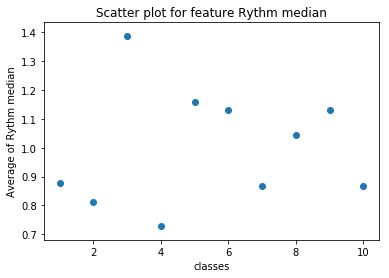

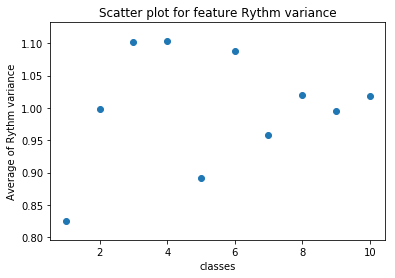

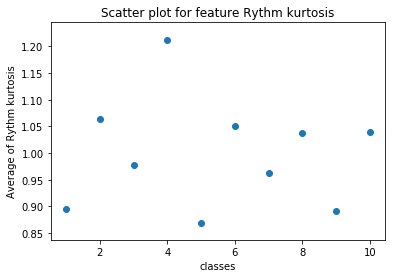

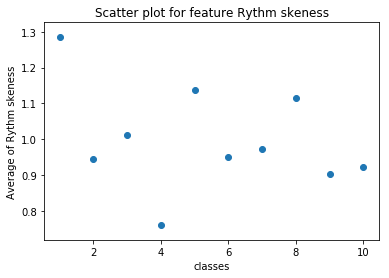

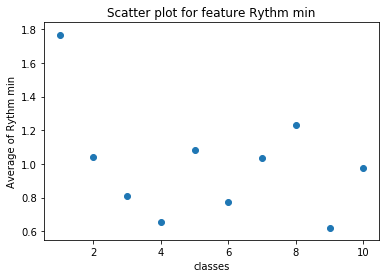

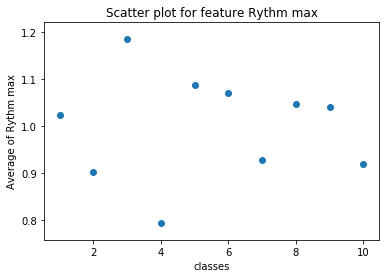

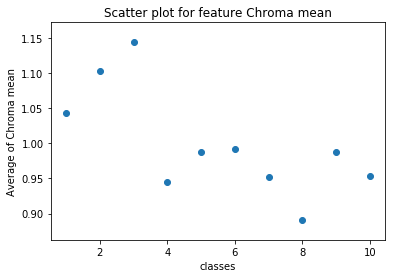

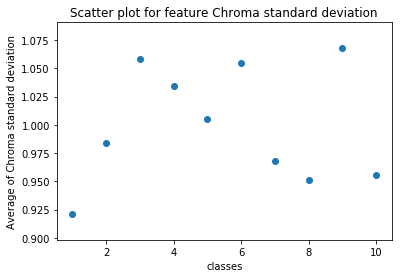

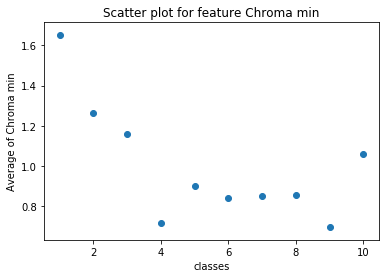

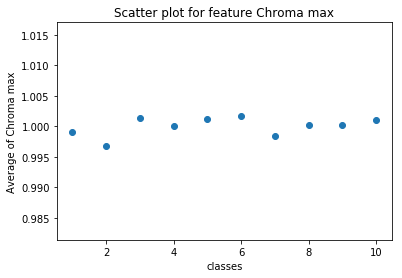

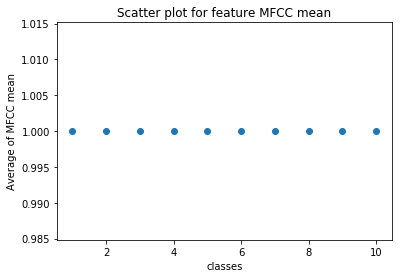

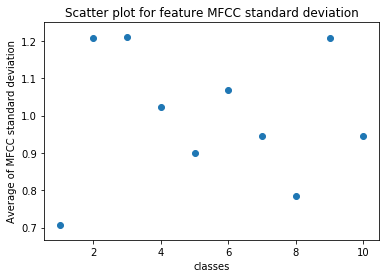

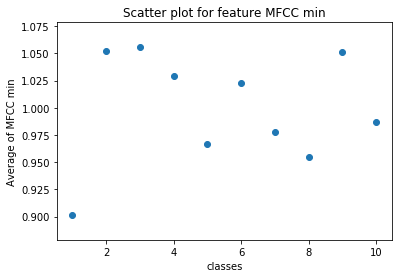

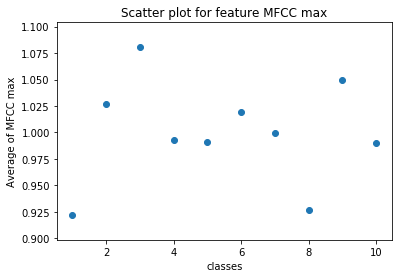

In [147]:
plotAllValuesWithAveragesAcrossTracks(X,Y,True)

48


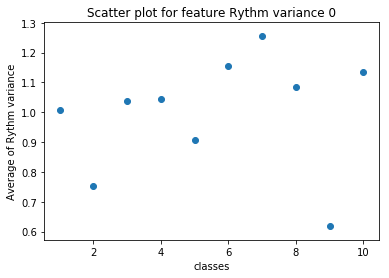

49


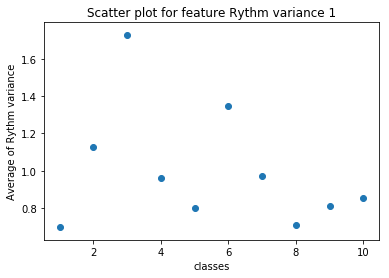

50


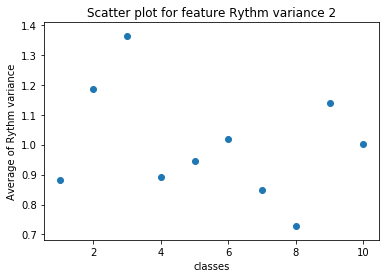

51


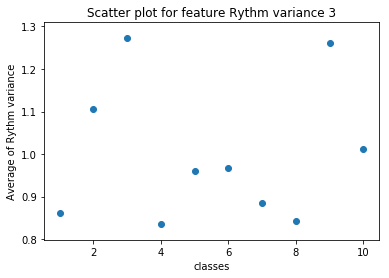

52


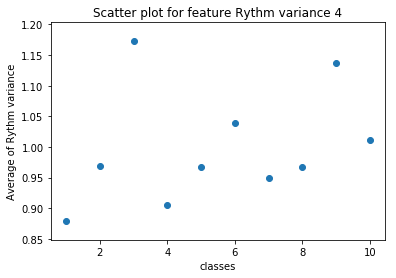

53


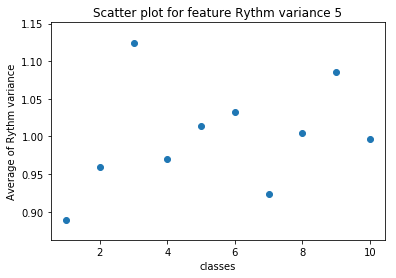

54


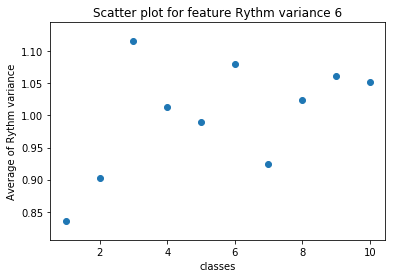

55


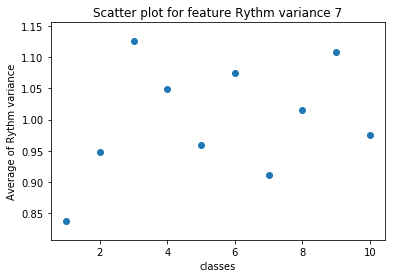

56


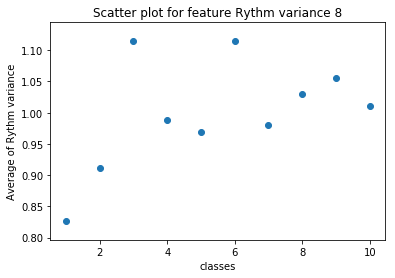

57


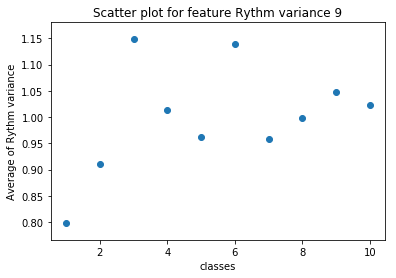

58


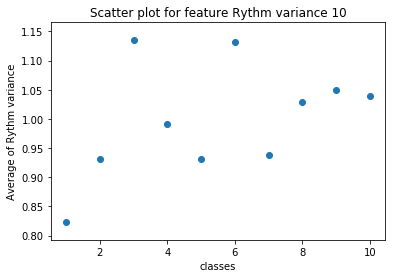

59


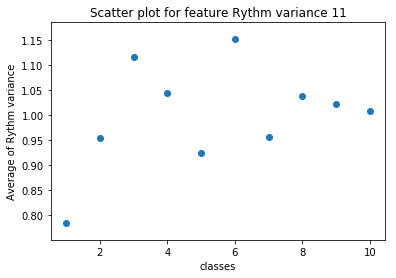

60


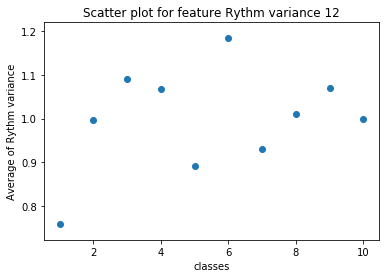

61


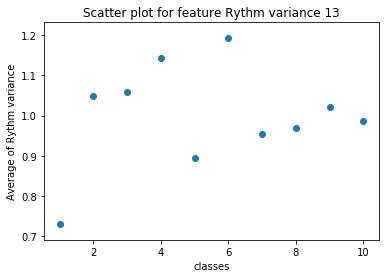

62


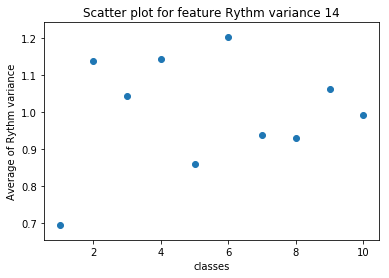

63


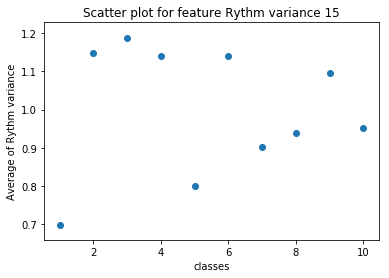

64


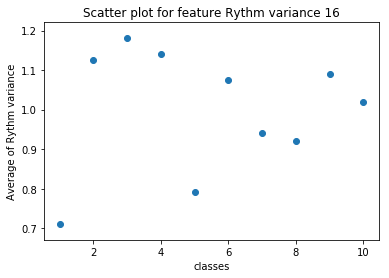

65


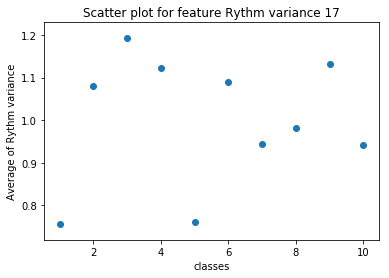

66


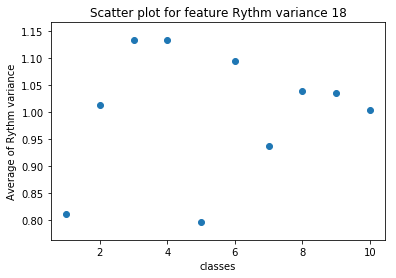

67


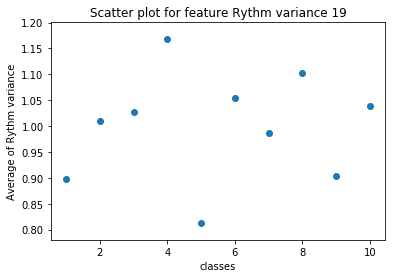

68


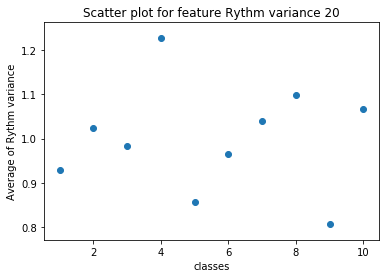

69


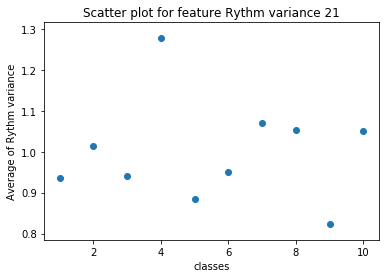

70


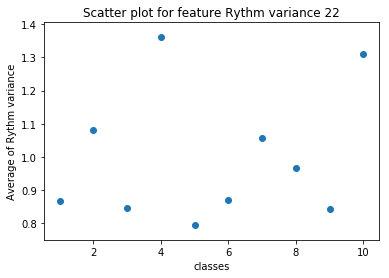

71


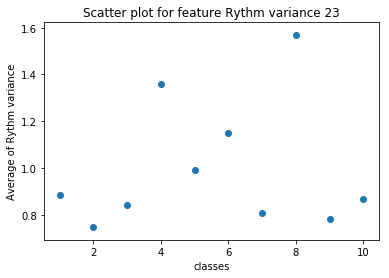

180


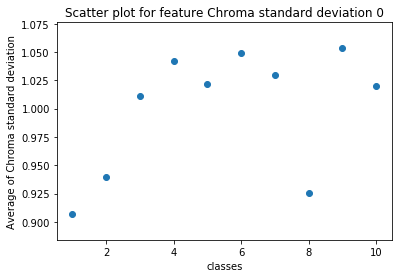

181


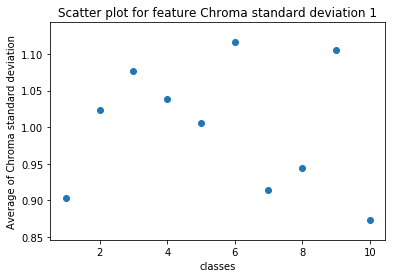

182


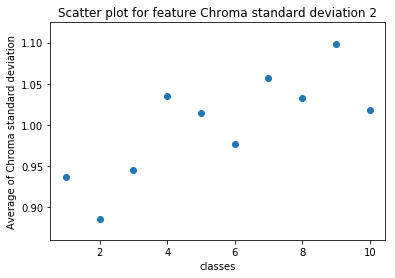

183


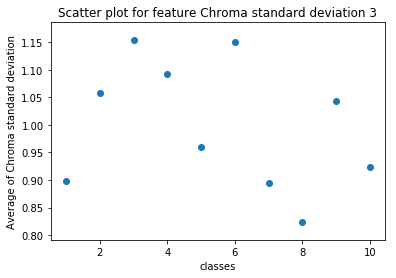

184


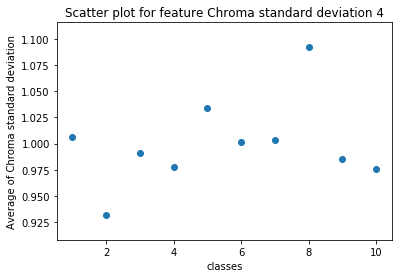

185


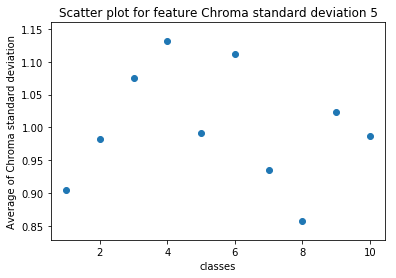

186


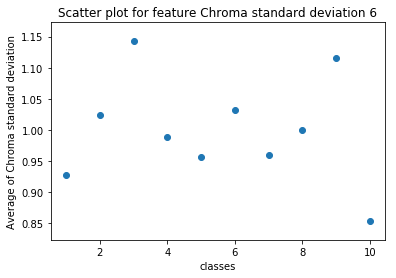

187


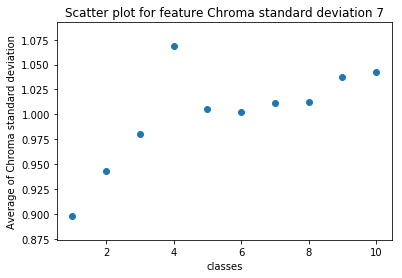

188


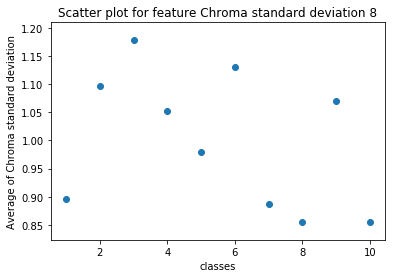

189


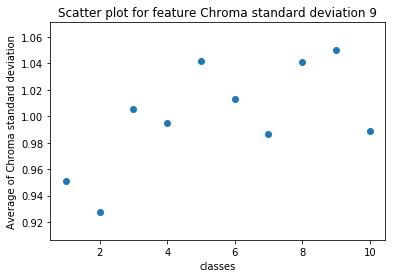

190


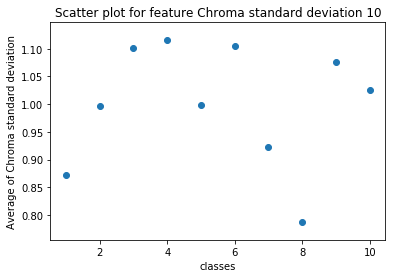

191


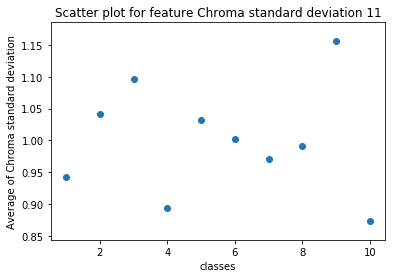

204


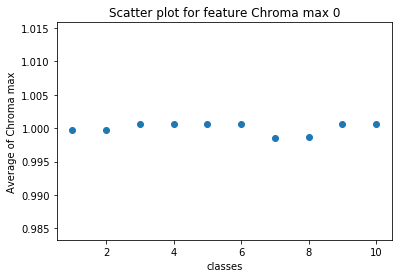

205


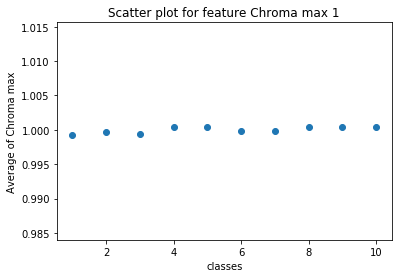

206


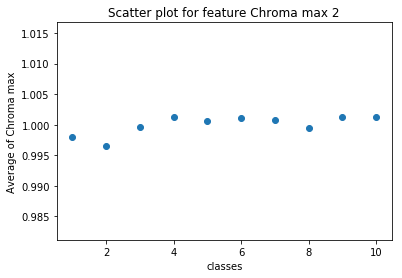

207


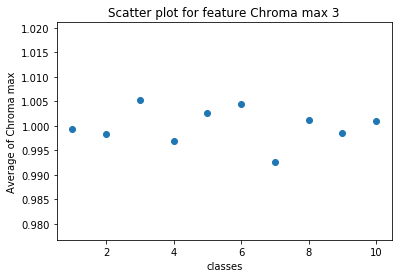

208


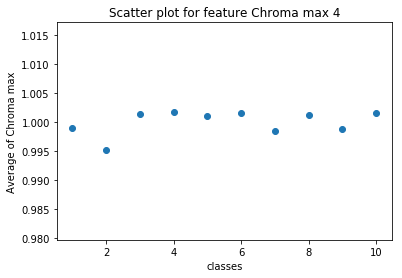

209


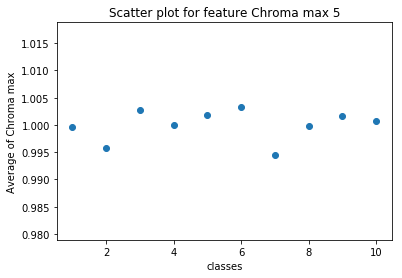

210


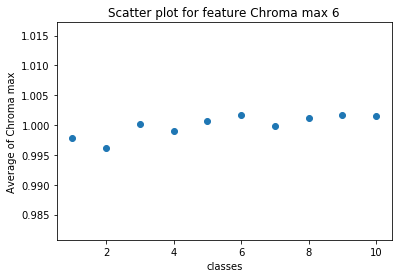

211


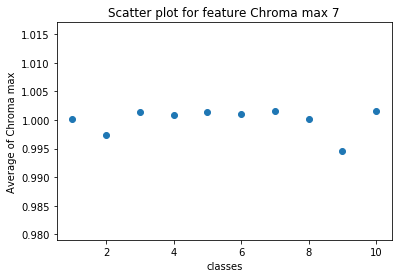

212


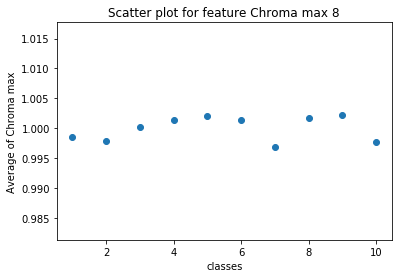

213


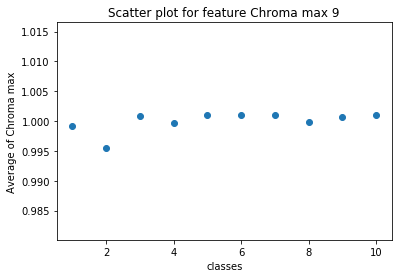

214


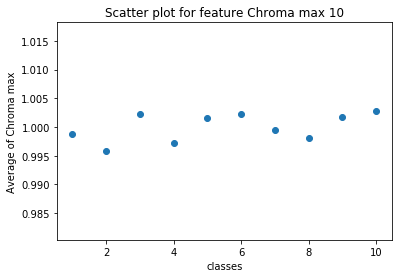

215


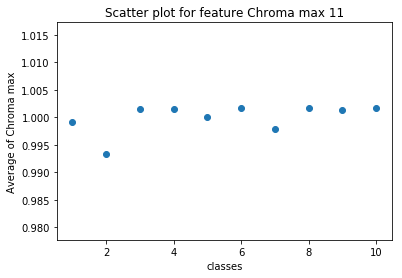

216


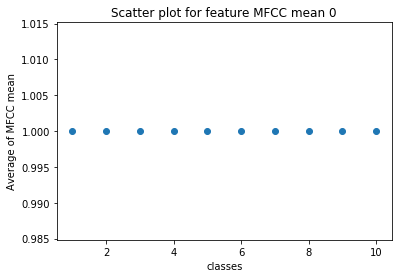

217


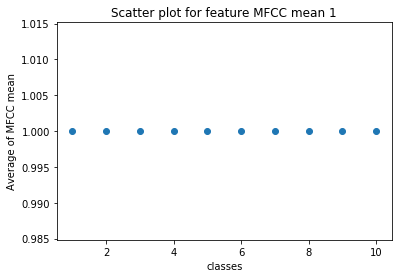

218


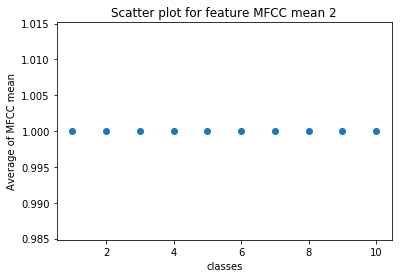

219


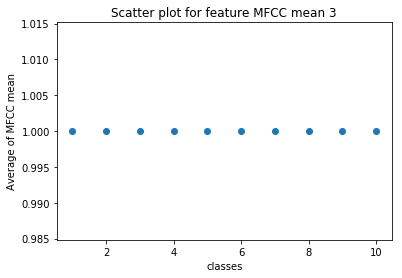

220


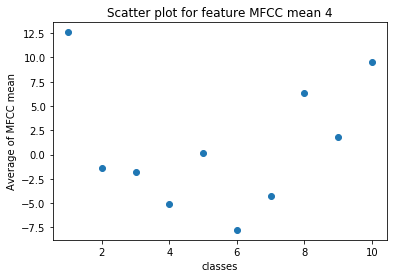

221


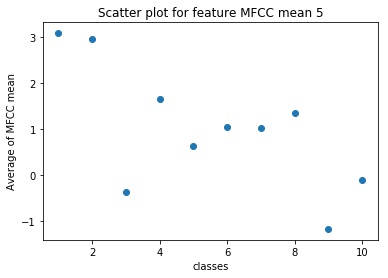

222


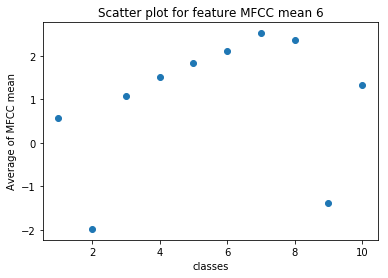

223


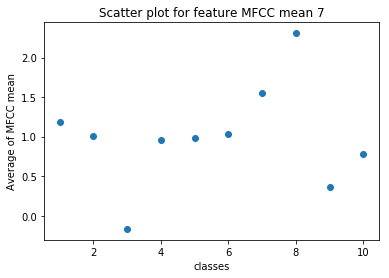

224


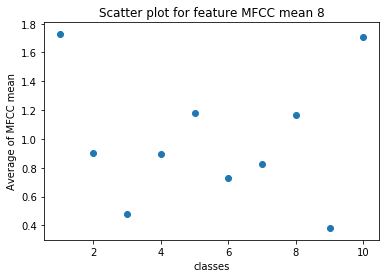

225


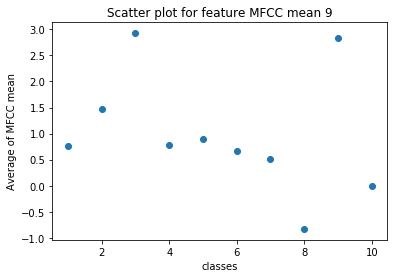

226


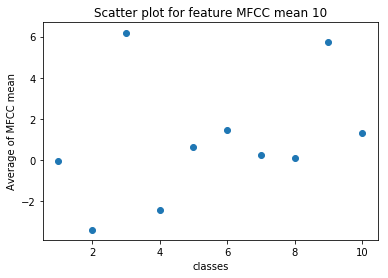

227


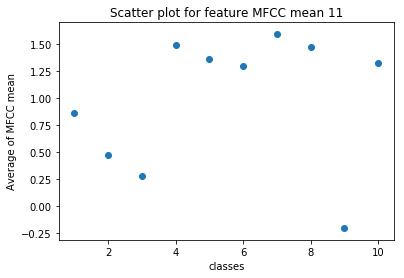

240


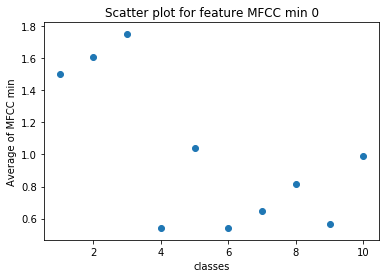

241


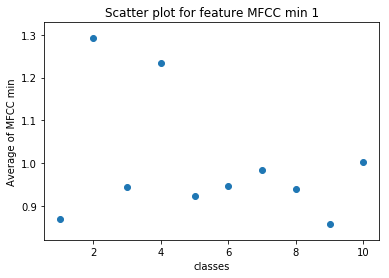

242


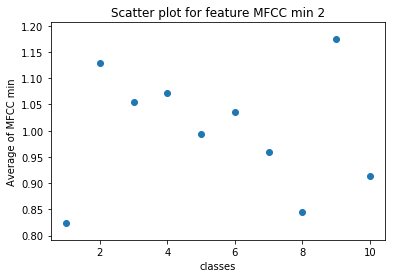

243


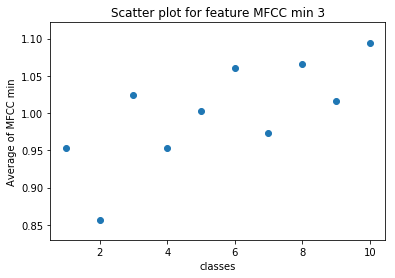

244


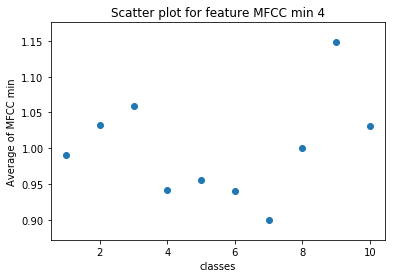

245


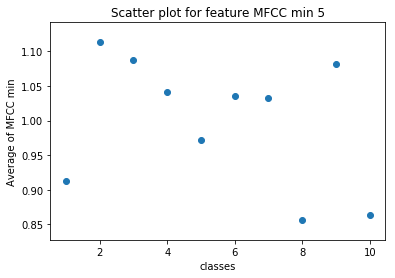

246


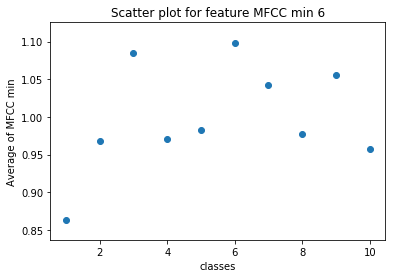

247


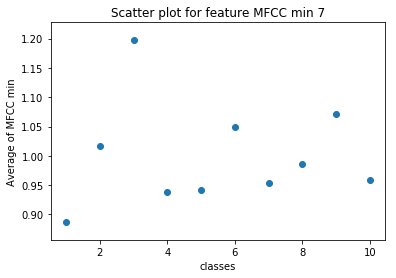

248


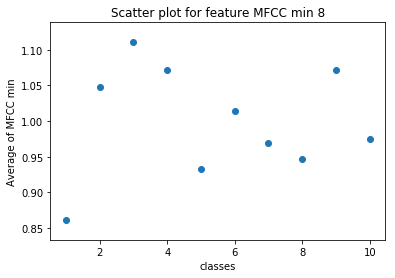

249


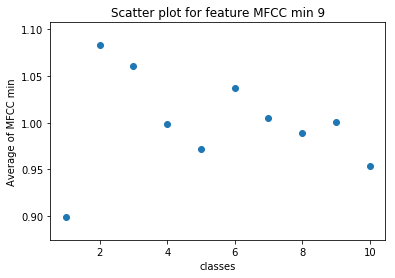

250


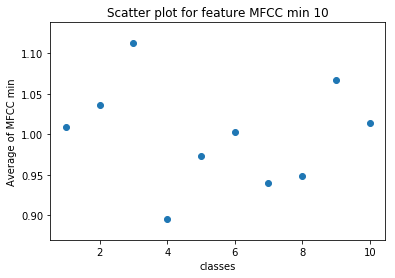

251


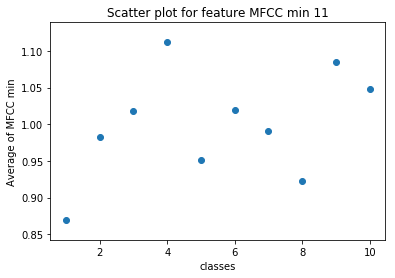

252


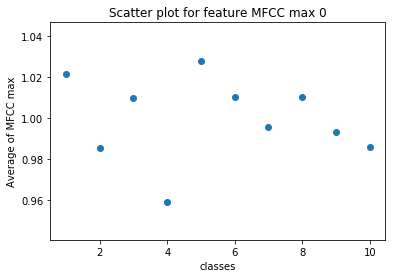

253


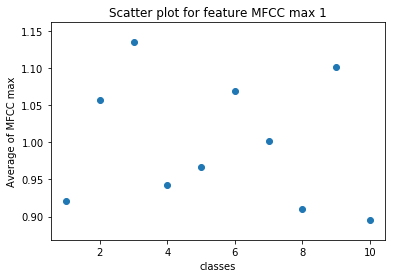

254


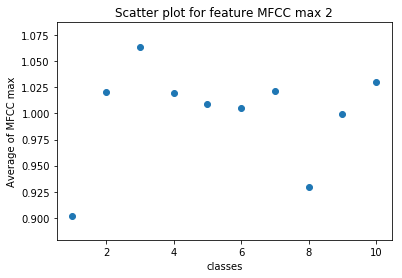

255


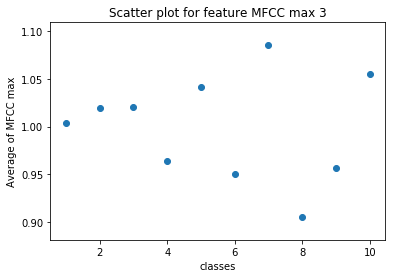

256


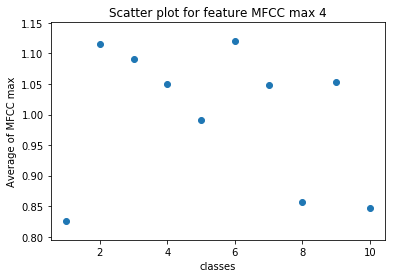

257


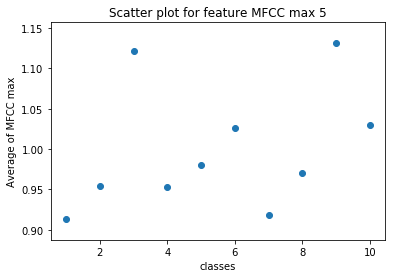

258


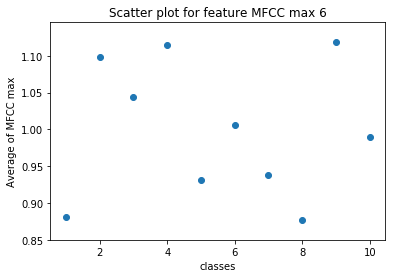

259


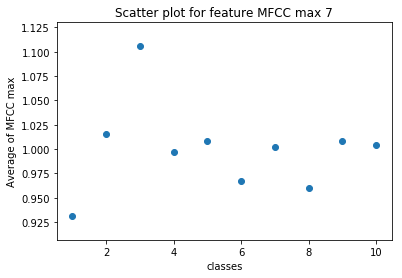

260


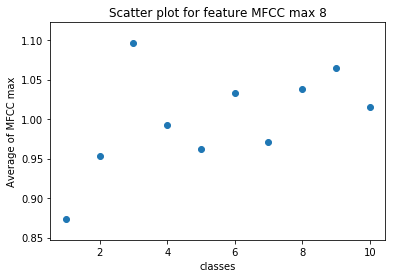

261


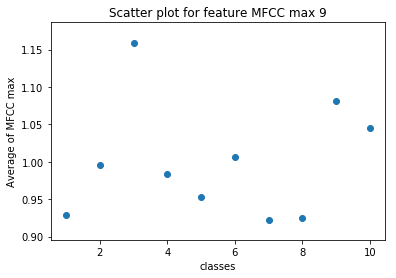

262


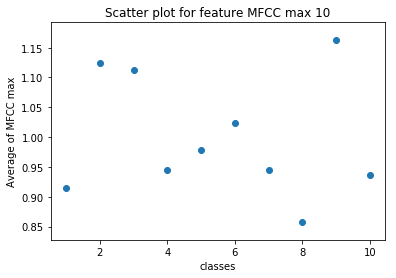

263


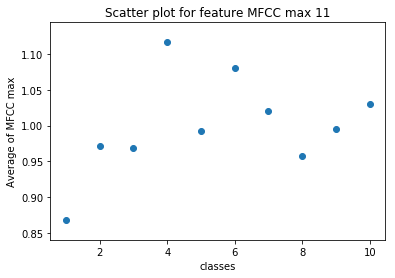

In [150]:
badValueProps = {'Rythm' : ['variance'],
                 'Chroma': ['standard deviation','max'],
                 'MFCC'  : ['mean','min','max']}

plotSpecifiedValuesPerTrack(X,Y,badValueProps,True)

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [4]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [5]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *